In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold,RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
import imblearn

In [ ]:
path = "/content/drive/MyDrive/datasets/diabetes with 2000 samples without outcome.csv"
data = pd.read_csv(path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [ ]:
np.set_printoptions(threshold = sys.maxsize)

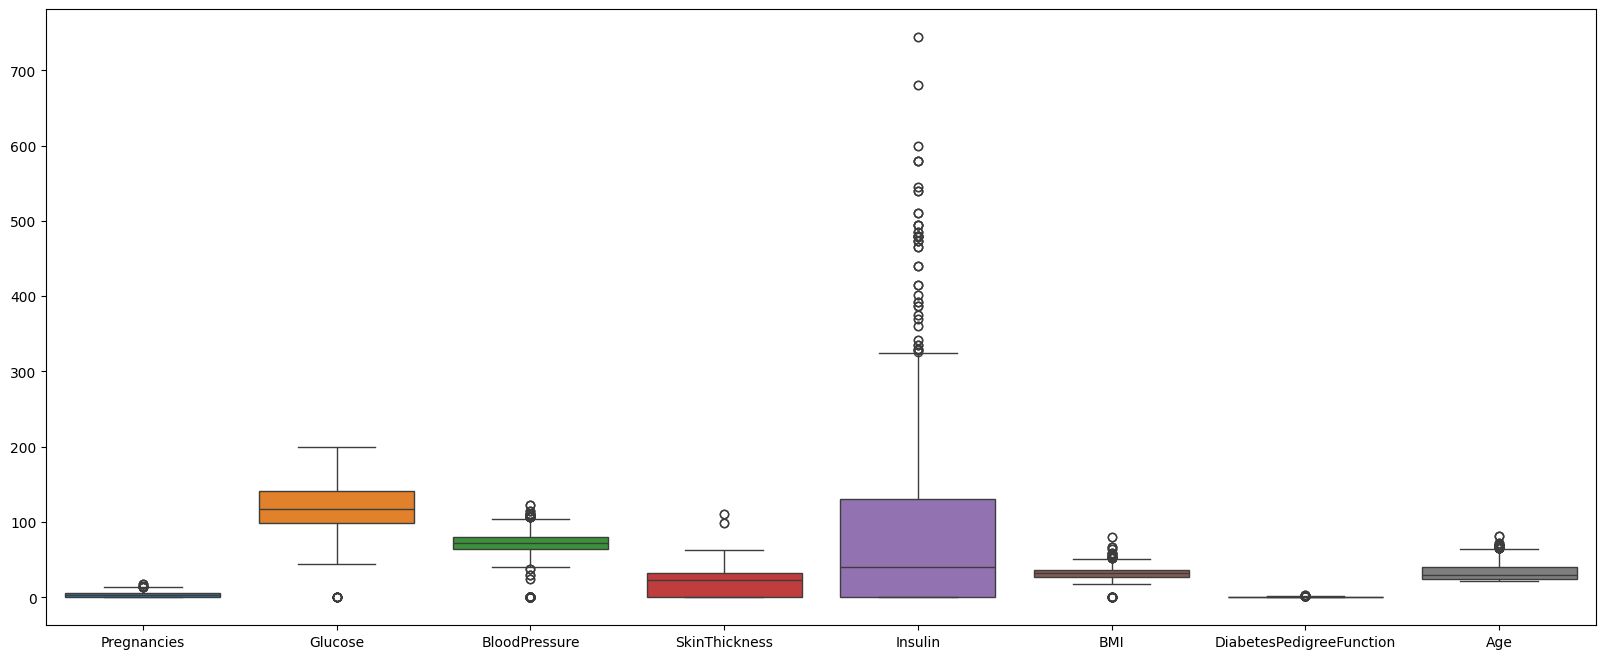

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data)
plt.show()

In [ ]:
Q1 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.25)
Q3 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.75)
IQR = Q3 - Q1

outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

data_without_outliers = data[~((data[outliers] < (Q1 - 1.5 * IQR)) | (data[outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
3,0,135,68,42,250,42.3,0.365,24
5,0,173,78,32,265,46.5,1.159,58
6,4,99,72,17,0,25.6,0.294,28
...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42


In [ ]:
data_without_outliers = data_without_outliers.reset_index()
data_without_outliers.drop(['index'],axis = 1,inplace = True)
data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,135,68,42,250,42.3,0.365,24
3,0,173,78,32,265,46.5,1.159,58
4,4,99,72,17,0,25.6,0.294,28
...,...,...,...,...,...,...,...,...
1647,1,79,60,42,48,43.5,0.678,23
1648,2,75,64,24,55,29.7,0.370,33
1649,8,179,72,42,130,32.7,0.719,36
1650,6,85,78,0,0,31.2,0.382,42


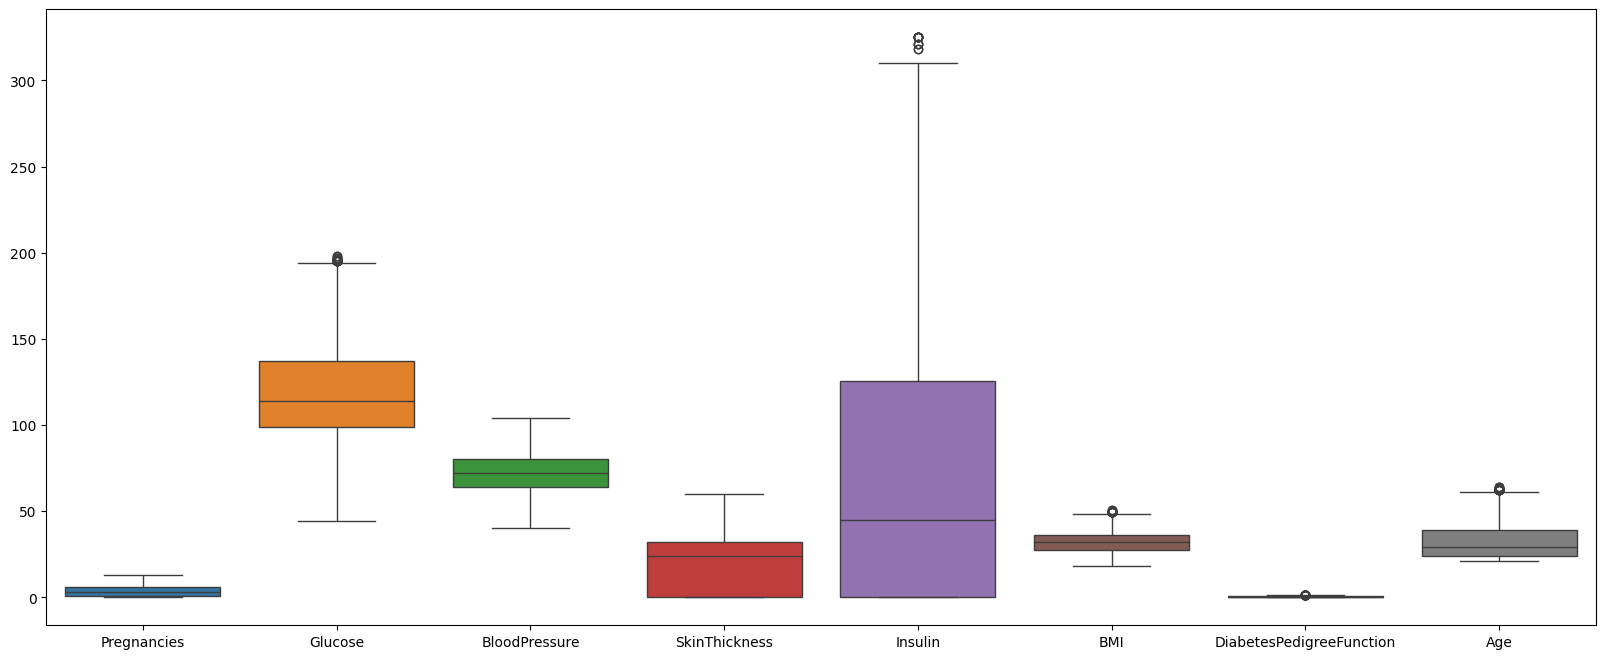

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data_without_outliers)
plt.show()

In [ ]:
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
data_without_outliers[columns_to_replace] = data_without_outliers[columns_to_replace].replace(0,np.nan)
data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35.0,NaN,33.6,0.127,47
1,0,84,82,31.0,125.0,38.2,0.233,23
2,0,135,68,42.0,250.0,42.3,0.365,24
3,0,173,78,32.0,265.0,46.5,1.159,58
4,4,99,72,17.0,NaN,25.6,0.294,28
...,...,...,...,...,...,...,...,...
1647,1,79,60,42.0,48.0,43.5,0.678,23
1648,2,75,64,24.0,55.0,29.7,0.370,33
1649,8,179,72,42.0,130.0,32.7,0.719,36
1650,6,85,78,NaN,NaN,31.2,0.382,42


In [ ]:
imputer = KNNImputer(n_neighbors=3)
data_without_outliers = imputer.fit_transform(data_without_outliers)
data_without_outliers

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, 3.50000000e+01,
        1.40000000e+02, 3.36000000e+01, 1.27000000e-01, 4.70000000e+01],
       [0.00000000e+00, 8.40000000e+01, 8.20000000e+01, 3.10000000e+01,
        1.25000000e+02, 3.82000000e+01, 2.33000000e-01, 2.30000000e+01],
       [0.00000000e+00, 1.35000000e+02, 6.80000000e+01, 4.20000000e+01,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [0.00000000e+00, 1.73000000e+02, 7.80000000e+01, 3.20000000e+01,
        2.65000000e+02, 4.65000000e+01, 1.15900000e+00, 5.80000000e+01],
       [4.00000000e+00, 9.90000000e+01, 7.20000000e+01, 1.70000000e+01,
        7.00000000e+01, 2.56000000e+01, 2.94000000e-01, 2.80000000e+01],
       [2.00000000e+00, 8.30000000e+01, 6.50000000e+01, 2.80000000e+01,
        6.60000000e+01, 3.68000000e+01, 6.29000000e-01, 2.40000000e+01],
       [2.00000000e+00, 8.90000000e+01, 9.00000000e+01, 3.00000000e+01,
        1.80000000e+02, 3.35000000e+01, 2.92000000e-01, 4.

In [ ]:
ss = StandardScaler()
data_without_outliers = ss.fit_transform(data_without_outliers)

In [ ]:
Kernel_PCA = KernelPCA(n_components=4,random_state=42)
data_pca = Kernel_PCA.fit_transform(data_without_outliers)
data_pca

array([[ 6.01654487e-01,  5.78035255e-02, -3.67434035e-01,
        -1.24107699e+00],
       [-4.23313297e-01, -1.26075875e+00,  1.37736218e+00,
        -8.76039844e-01],
       [ 1.33443893e+00, -2.67337503e+00, -4.55212867e-02,
        -6.23262948e-01],
       [ 3.63453125e+00, -1.33215872e+00, -1.07345378e+00,
         2.47750572e+00],
       [-1.70893637e+00,  9.01004129e-01, -8.24371390e-02,
        -2.98736550e-01],
       [-1.16590255e+00, -7.32068024e-01,  1.34708137e+00,
         8.89403060e-01],
       [ 7.51678932e-01,  1.95425629e-01,  6.33416900e-01,
        -6.79291573e-01],
       [-3.09488806e-01,  2.10563953e-01,  1.16991138e+00,
        -1.13014614e+00],
       [ 8.91136193e-02,  9.03968504e-01, -8.14322549e-01,
         2.90791302e+00],
       [-9.25676196e-01,  7.18031391e-01, -2.41977837e-01,
        -4.29962546e-01],
       [-1.89333676e+00,  8.50290413e-02,  4.14698969e-01,
         7.02061798e-01],
       [ 1.76868931e+00,  1.85911691e+00, -1.97948186e+00,
      

In [ ]:
final_data = pd.DataFrame(data_pca,columns=['Feature_1','Feature_2','Feature_3','Feature_4'])
final_data

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.601654,0.057804,-0.367434,-1.241077
1,-0.423313,-1.260759,1.377362,-0.876040
2,1.334439,-2.673375,-0.045521,-0.623263
3,3.634531,-1.332159,-1.073454,2.477506
4,-1.708936,0.901004,-0.082437,-0.298737
...,...,...,...,...
1647,-0.553867,-1.671019,2.518651,0.925516
1648,-1.775076,0.390360,0.888011,0.000081
1649,2.049475,0.407314,-0.486110,0.840052
1650,-0.160934,1.489150,1.071542,-0.061987


In [ ]:
final_data = final_data.values

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(final_data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[10023.994437214453, 7268.567881210389, 5925.217362037436, 5163.105833403921, 4630.956075770773, 4226.797893435848, 3874.1113562744367, 3629.8610876609437, 3412.194674405955, 3212.786725173807]


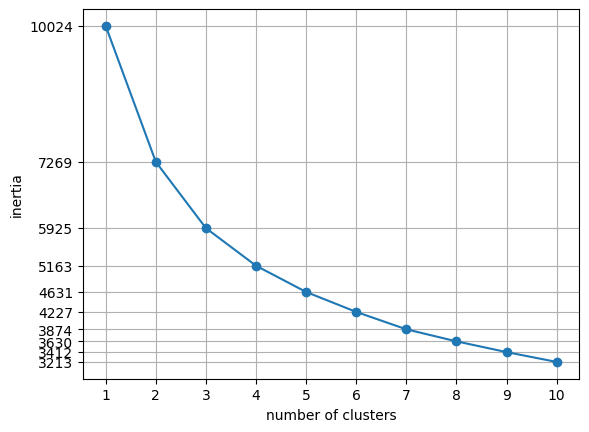

In [ ]:
plt.plot(range(1,11),wcss,marker = "o")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.yticks([10023.994437214453, 7268.567881210389, 5925.217362037436, 5163.105833403921, 4630.956075770773, 4226.797893435848, 3874.1113562744367, 3629.8610876609437, 3412.194674405955, 3212.786725173807])
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()